# D7041E Applied artificial intelligence (Lab1, Task 1.1 - Creating own dataset)
Nazrul Islam & Srinivas Bobba (Group 6)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from PIL import Image

## 1. Making an array containing images

We have loaded 5 images in the images array, which are basically randomly collected from google search.

In [ ]:
image_dir = 'images'

In [ ]:
#load images one by one and store in an array
localImages = []
for filename in os.listdir(image_dir):
    localImage = mpimg.imread(os.path.join(image_dir, filename))
    if (filename is not None):
        localImages.append(localImage)

localImages = np.array(localImages)

<ipython-input-47-40b229ecb6fc>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  localImages = np.array(localImages)


Now we see the shapes of the different images loaded in the array.

In [ ]:
for img in localImages:
  print(img.shape)

(790, 1333, 3)
(409, 754, 3)
(339, 508, 3)
(431, 712, 3)
(280, 480, 3)


Here, we try to view the images loaded in the array.

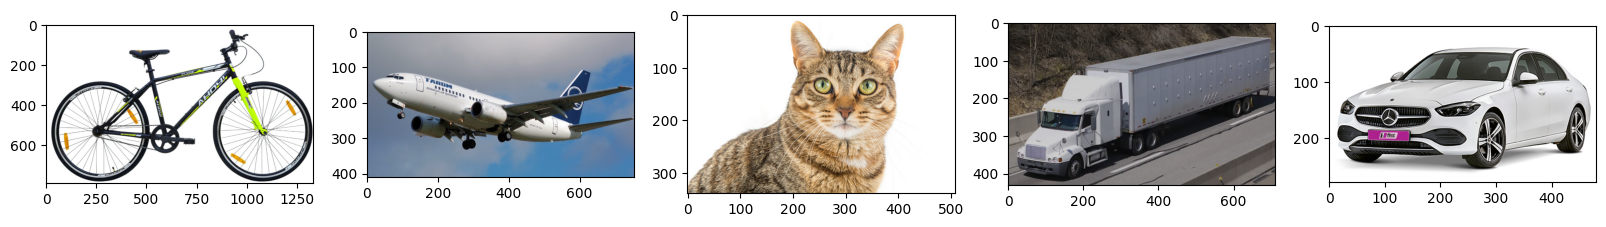

In [ ]:
fig, axes = plt.subplots(figsize=(20, 20), ncols=5, nrows=1)

for i, img in enumerate(localImages):
  axes[i].imshow(img)

As we can see, these images are of different sizes. In the given task, the images should have x and y resolution, so we normalize all the images to one size below.

In [ ]:
import cv2

#r = cv2.resize(localImages[0],(300,300))
localImages_onesize = [cv2.resize(img,(32,32)) for img in localImages]

In [ ]:
for img in localImages_onesize:
  print(img.shape)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


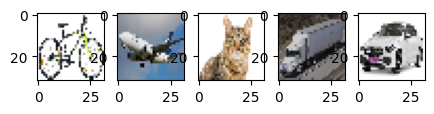

In [ ]:
fig, axes = plt.subplots(figsize=(5, 5), ncols=5, nrows=1)

for i, img in enumerate(localImages_onesize):
  axes[i].imshow(img)

##2. Function to plot a single image

In [ ]:
def plotImage(X):
    plt.figure(figsize=(5, 5))
    plt.imshow(X)
    plt.show()
    plt.close()

##3. Preprocessing for deep learning from the article
https://hadrienj.github.io/posts/Preprocessing-for-deep-learning/

In [ ]:
localImages_onesize = np.array(localImages_onesize, dtype=object)
X = localImages_onesize[:5]

In [ ]:
#reshape the array to have flat image data with one image per row
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print (X.shape)

(5, 3072)


In [ ]:
#rescale the images to obtain the range [0, 1] by dividing by 255 (the maximum value of the pixels).
X_norm = X / 255.
print('X.min()', X_norm.min())
print('X.max()', X_norm.max())

X.min() 0.0
X.max() 1.0


In [ ]:
#Subtract the mean from all image.
X_norm = X_norm - X_norm.mean(axis=0)

In [ ]:
#calculate the covariance matrix of the zero-centered data.
cov = np.cov(X_norm.astype(float), rowvar=False)

In [ ]:
print(cov.shape)

(3072, 3072)


In [ ]:
#calculate the singular values and vectors of the covariance matrix and use them to rotate our dataset
U,S,V = np.linalg.svd(cov)
print(U.shape, S.shape)

(3072, 3072) (3072,)


In [ ]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T

In [ ]:
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print('min:', X_ZCA_rescaled.min())
print('max:', X_ZCA_rescaled.max())

min: 0.0
max: 1.0


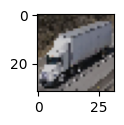

In [ ]:
plt.figure(figsize=(1, 1))
plt.imshow(localImages_onesize[3])

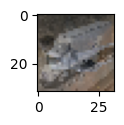

In [ ]:
plt.figure(figsize=(1, 1))
plt.imshow(X_ZCA_rescaled[3,:].reshape(32,32,3).astype(float))